<h1><center>CSCI - 6409 - Process of Data Science - Summer 2022</h1></center>

<h1><center>Assignment 3</h1></center>

Benny Daniel Tharigopala -
B00899629

Karthik Kannan Nanthakumar - B00891387


# **Import Files to Google Colab**




In [ ]:
from google.colab import files
# uploaded = files.upload()
# https://www.kaggle.com/datasets/parvezmrobin/amazon-book-review-1m-sample
# https://medium.com/@qempsil0914/machine-learning-nlp-text-classification-with-amazon-review-data-using-python3-step-by-step-3fb0cc0cecc1
# https://t-lanigan.github.io/amazon-review-classifier/

# https://www.dataquest.io/blog/python-json-tutorial/

# Imports

In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
source_dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/sample.jsonl', lines=True)

# Shape of the dataframe

In [ ]:
print(source_dataset.shape)

(1000000, 12)


In [ ]:
source_dataset.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,3,2,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,NaN
1,5,NaN,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,1418256000,NaN
2,4,3,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,NaN
3,4,NaN,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,NaN
4,2,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,NaN
5,4,4,False,"06 22, 2004",A2KSU7OOJ5C479,0002005263,{'Format:': ' Hardcover'},Loren D. Morrison,"I, like many of the other reviewers here, am a...","A COMPLEX , SUSPENSEFUL PLOT, BUT . . . . .",1087862400,NaN
6,5,2,True,"01 21, 2004",A3FT7WR9YGU4RK,0002005263,{'Format:': ' Audio CD'},Anne Melvin,I had the CD read by George\nGuidall who does ...,A good mystery.,1074643200,NaN
7,1,9,True,"06 10, 2003",AMFB2GBB2O84X,0002005263,{'Format:': ' Hardcover'},Brakaian,I am a huge Tony Hillerman fan -- I've read ea...,Easily Hillerman's worst -- very disappointing,1055203200,NaN
8,5,NaN,True,"12 18, 2017",A243JAEFC50KWI,0001384198,{'Format:': ' Hardcover'},dorothy,We all love the classics.,Classics never die.,1513555200,NaN
9,5,NaN,True,"09 6, 2017",A25B7XXSTTN1IY,0001384198,{'Format:': ' Hardcover'},Snake,I love it,Five Stars,1504656000,NaN


# **1.A. Data quality report:**
The data quality report consists of:
1. A tabular report describing the various statistics of the SUMMARY & REVIEW_TEXT
2. Data visualizations of values in each feature 

Reference - [Brightspace Tutorial](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View)

In [ ]:
import warnings

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)
#Referred from Tutorial 2 of CSCI 6409 - [https://dal.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fe8e7287-82c2-42bc-85ac-ae940127b726]


# What are the features in the Amazon Review Dataset ?

# How many null instances do each columns have ?

In [ ]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1000000 non-null  int64 
 1   vote            195489 non-null   object
 2   verified        1000000 non-null  bool  
 3   reviewTime      1000000 non-null  object
 4   reviewerID      1000000 non-null  object
 5   asin            1000000 non-null  object
 6   style           982181 non-null   object
 7   reviewerName    999966 non-null   object
 8   reviewText      999876 non-null   object
 9   summary         999693 non-null   object
 10  unixReviewTime  1000000 non-null  int64 
 11  image           2233 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 84.9+ MB


## We can observe that 6 out of 12 columns of the dataset do not have any Null-records within them, since the total number of rows is **1000000** and the number of non-null records in each column is also **1000000**.

##

# Now let's peek at the first few rows of our data frame

In [ ]:
source_dataset.loc[0]

overall                                                           3
vote                                                              2
verified                                                      False
reviewTime                                              05 18, 2002
reviewerID                                            AJ8AQG2X9JJ2Y
asin                                                     0001712799
style                      {'Format:': ' School & Library Binding'}
reviewerName                                         Donald Gillies
reviewText        Dr. Seuss has some really brilliant books.  Th...
summary                              A below-average Dr. Seuss Book
unixReviewTime                                           1021680000
image                                                           NaN
Name: 0, dtype: object

# Fit the best possible datatypes for columns of type object.

In [ ]:
source_dataset = source_dataset.convert_dtypes()
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  Int64  
 1   vote            195489 non-null   string 
 2   verified        1000000 non-null  boolean
 3   reviewTime      1000000 non-null  string 
 4   reviewerID      1000000 non-null  string 
 5   asin            1000000 non-null  string 
 6   style           982181 non-null   object 
 7   reviewerName    999966 non-null   string 
 8   reviewText      999876 non-null   string 
 9   summary         999693 non-null   string 
 10  unixReviewTime  1000000 non-null  Int64  
 11  image           2233 non-null     object 
dtypes: Int64(2), boolean(1), object(2), string(7)
memory usage: 87.7+ MB


##Notice that the column 'style' requires transformation since it's in the form of a "dictionary. We need to extract the value corresponding to 'Format' in each instance.

In [ ]:
dic = {'Format:': ' No Format'}
print(type(dic))

dic2 = dict({'Format:': ' No Format'})
print(type(dic2))
print(dic2)

<class 'dict'>
<class 'dict'>
{'Format:': ' No Format'}


In [ ]:
source_dataset['style'].isna().sum()

17819

## Extracting the format of the book for each review and setting format as ' No Format' for those reviews where the format is not specified.

In [ ]:
source_dataset['format'] = [d.get("Format:") if isinstance(d,dict) else 'No Format' for d in source_dataset['style']]

In [ ]:
source_dataset.head(25)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,format
0,3,2,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,NaN,School & Library Binding
1,5,<NA>,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,1418256000,NaN,Hardcover
2,4,3,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,NaN,Hardcover
3,4,<NA>,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,NaN,Kindle Edition
4,2,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,NaN,Kindle Edition
5,4,4,False,"06 22, 2004",A2KSU7OOJ5C479,0002005263,{'Format:': ' Hardcover'},Loren D. Morrison,"I, like many of the other reviewers here, am a...","A COMPLEX , SUSPENSEFUL PLOT, BUT . . . . .",1087862400,NaN,Hardcover
6,5,2,True,"01 21, 2004",A3FT7WR9YGU4RK,0002005263,{'Format:': ' Audio CD'},Anne Melvin,I had the CD read by George Guidall who does a...,A good mystery.,1074643200,NaN,Audio CD
7,1,9,True,"06 10, 2003",AMFB2GBB2O84X,0002005263,{'Format:': ' Hardcover'},Brakaian,I am a huge Tony Hillerman fan -- I've read ea...,Easily Hillerman's worst -- very disappointing,1055203200,NaN,Hardcover
8,5,<NA>,True,"12 18, 2017",A243JAEFC50KWI,0001384198,{'Format:': ' Hardcover'},dorothy,We all love the classics.,Classics never die.,1513555200,NaN,Hardcover
9,5,<NA>,True,"09 6, 2017",A25B7XXSTTN1IY,0001384198,{'Format:': ' Hardcover'},Snake,I love it,Five Stars,1504656000,NaN,Hardcover


## As visible from the information panel below, the Dataframe contains 3 objects of type 'object'

1. style

2. image and

3. format

We have extract the value from the column 'style' and stored it in the column 'format'. Also, the column 'image' does not hold any significance as it contains only 2233 Non-null values. Therefore we will remove the columns 'style' and 'image' in subsequent steps.

In [ ]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  Int64  
 1   vote            195489 non-null   string 
 2   verified        1000000 non-null  boolean
 3   reviewTime      1000000 non-null  string 
 4   reviewerID      1000000 non-null  string 
 5   asin            1000000 non-null  string 
 6   style           982181 non-null   object 
 7   reviewerName    999966 non-null   string 
 8   reviewText      999876 non-null   string 
 9   summary         999693 non-null   string 
 10  unixReviewTime  1000000 non-null  Int64  
 11  image           2233 non-null     object 
 12  format          999940 non-null   object 
dtypes: Int64(2), boolean(1), object(3), string(7)
memory usage: 95.4+ MB


##Fitting the best possible datatype for the column 'format'

In [ ]:
source_dataset = source_dataset.convert_dtypes()
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  Int64  
 1   vote            195489 non-null   string 
 2   verified        1000000 non-null  boolean
 3   reviewTime      1000000 non-null  string 
 4   reviewerID      1000000 non-null  string 
 5   asin            1000000 non-null  string 
 6   style           982181 non-null   object 
 7   reviewerName    999966 non-null   string 
 8   reviewText      999876 non-null   string 
 9   summary         999693 non-null   string 
 10  unixReviewTime  1000000 non-null  Int64  
 11  image           2233 non-null     object 
 12  format          999940 non-null   string 
dtypes: Int64(2), boolean(1), object(2), string(8)
memory usage: 95.4+ MB


In [ ]:
source_dataset.drop(columns=["style","image"],axis=1,inplace=True)

In [ ]:
source_dataset.drop(columns=["vote"],axis=1,inplace=True)

In [ ]:
source_dataset.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'format'],
      dtype='object')

## Let us now add some more properties to the dataframe.
First we will add the following properties for the reviewText:

● Number of characters.

● The number of words.

● Boolean Value to indicate the presence of non-alphanumeric characters.


In [ ]:
source_dataset.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format
0,3,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,School & Library Binding
1,5,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,True Value Girl,Love it,Five Stars,1418256000,Hardcover
2,4,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,Hardcover
3,4,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,Kindle Edition
4,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,Kindle Edition


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Creating a column for the total number of characters in each Review Text Instance

In [ ]:
source_dataset['reviewText_num_characters'] = [len(d) if isinstance(d,str) else 0 for d in source_dataset['reviewText']]
# source_dataset['format'] = [d.get("Format:") if isinstance(d,dict) else 'No Format' for d in source_dataset['style']]

## Creating a column for the total number of words in each Review Text Instance

In [ ]:
source_dataset['reviewText_num_words'] = [len(d.split()) if isinstance(d,str) else 0 for d in source_dataset['reviewText']]


## Creating a column for verifying if the reviewText containes Non-AlphaNumeric characters

In [ ]:
source_dataset['contains_Non_AlphaNumeric'] = ["False" if isinstance(d,str) and d.replace(" ","").isalnum()  else "True" for d in source_dataset['reviewText']]

In [ ]:
# # source_dataset[source_dataset['reviewText_num_words'] == 1.0])
# # type(source_dataset['reviewText'][5847])
# for d in source_dataset['reviewText']:
#   if isinstance(d,str) and d.replace(" ","").isalnum():
#     print("True - No SPl")
#   else:
#     print("No Review Text")

In [ ]:
source_dataset.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format,reviewText_num_characters,reviewText_num_words,contains_Non_AlphaNumeric
0,3,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,School & Library Binding,617,117,True
1,5,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,True Value Girl,Love it,Five Stars,1418256000,Hardcover,7,2,False
2,4,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,Hardcover,1419,247,True
3,4,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,Kindle Edition,314,45,True
4,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,Kindle Edition,235,45,True


# Split the Datatypes into Numerical and Categorical attributes

**Let's Segregate the columns with numerical values**

In [ ]:
source_dataset.describe(include=['number'])

,overall,verified,unixReviewTime,reviewText_num_characters,reviewText_num_words
count,1000000.00,1000000,1000000.00,1000000.00,1000000.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,True,NaN,NaN,NaN
freq,NaN,674237,NaN,NaN,NaN
mean,4.37,NaN,1406255022.37,541.05,96.48
std,1.00,NaN,101010911.58,867.98,150.61
min,1.00,NaN,849657600.00,0.00,0.00
25%,4.00,NaN,1376265600.00,114.00,21.00
50%,5.00,NaN,1425686400.00,227.00,42.00
75%,5.00,NaN,1472601600.00,599.00,108.00


**Let's Segregate the columns with categorical values**

In [ ]:
source_dataset.describe(exclude=['number'])

,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,format,contains_Non_AlphaNumeric
count,1000000,1000000,1000000,999966,999876,999693,999940,1000000
unique,7514,610262,323635,435945,952186,629717,90,2
top,"02 20, 2015",A2F6N60Z96CAJI,038568231X,Amazon Customer,Great,Five Stars,Kindle Edition,True
freq,1537,317,1013,46661,1105,93655,561493,943365


# 1.B.Data Quality Report for Continuous Features:
Code refererred from [CSCI 6409 - Tutorial 2](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View)

In [ ]:
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df
build_continuous_features_report(source_dataset)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
overall,1000000,0.00,5,1,4.00,4.37,5.00,5.00,5,1.00
verified,1000000,0.00,2,False,0.00,0.67,1.00,1.00,True,0.47
unixReviewTime,1000000,0.00,7514,849657600,1376265600.00,1406255022.37,1425686400.00,1472601600.00,1537920000,101010911.58
reviewText_num_characters,1000000,0.00,7917,0,114.00,541.05,227.00,599.00,31759,867.98
reviewText_num_words,1000000,0.00,2000,0,21.00,96.48,42.00,108.00,5359,150.61


# Data Quality Report for Categorical Features:
Code refererred from [CSCI 6409 - Tutorial 2](https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View)

In [ ]:
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list()).T

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
# test_dataset = source_dataset[["reviewText","format"]].copy()
build_categorical_features_report(source_dataset)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
reviewTime,1000000,0.00,7514,"02 20, 2015",1537,0.15,"03 29, 2016",1243,0.12
reviewerID,1000000,0.00,610262,A2F6N60Z96CAJI,317,0.03,A2OJW07GQRNJUT,240,0.02
asin,1000000,0.00,323635,038568231X,1013,0.10,0297859382,828,0.08
reviewerName,1000000,0.00,435945,Amazon Customer,46661,4.67,Kindle Customer,32034,3.20
reviewText,1000000,0.01,952186,Great,1105,0.11,good,1071,0.11
summary,1000000,0.03,629717,Five Stars,93655,9.37,Four Stars,23557,2.36
format,1000000,0.01,90,Kindle Edition,561493,56.15,Paperback,229310,22.93
contains_Non_AlphaNumeric,1000000,0.00,2,True,943365,94.34,False,56635,5.66


In [ ]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   overall                    1000000 non-null  Int64  
 1   verified                   1000000 non-null  boolean
 2   reviewTime                 1000000 non-null  string 
 3   reviewerID                 1000000 non-null  string 
 4   asin                       1000000 non-null  string 
 5   reviewerName               999966 non-null   string 
 6   reviewText                 999876 non-null   string 
 7   summary                    999693 non-null   string 
 8   unixReviewTime             1000000 non-null  Int64  
 9   format                     999940 non-null   string 
 10  reviewText_num_characters  1000000 non-null  int64  
 11  reviewText_num_words       1000000 non-null  int64  
 12  contains_Non_AlphaNumeric  1000000 non-null  object 
dtypes: Int64(2), 

# Visualization of Continuous Features

## Configuring Plot properties

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["font.size"] = 15

## Histogram for the column - overall

Text(0.5, 1.0, 'Overall Histogram')

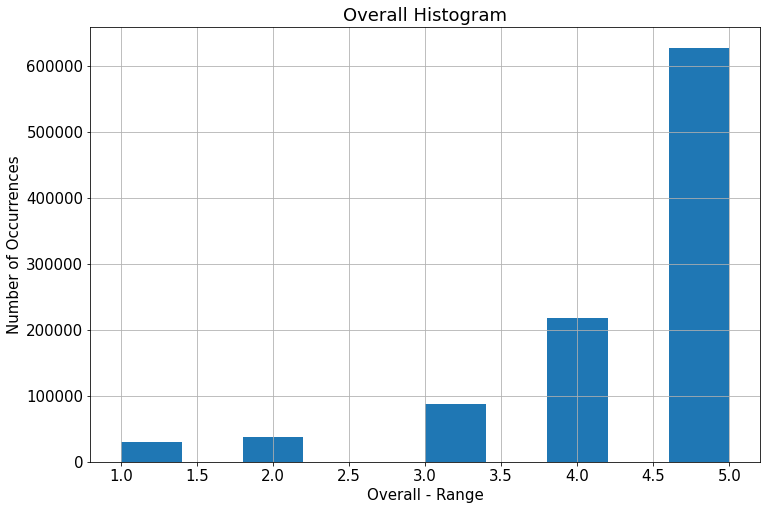

In [ ]:
source_dataset.hist(column=['overall'])
plt.xlabel('Overall - Range')
plt.ylabel('Number of Occurrences')
plt.title('Overall Histogram')

## Histogram for the column - UnixReviewTime

Text(0.5, 1.0, 'UnixReviewTime Histogram')

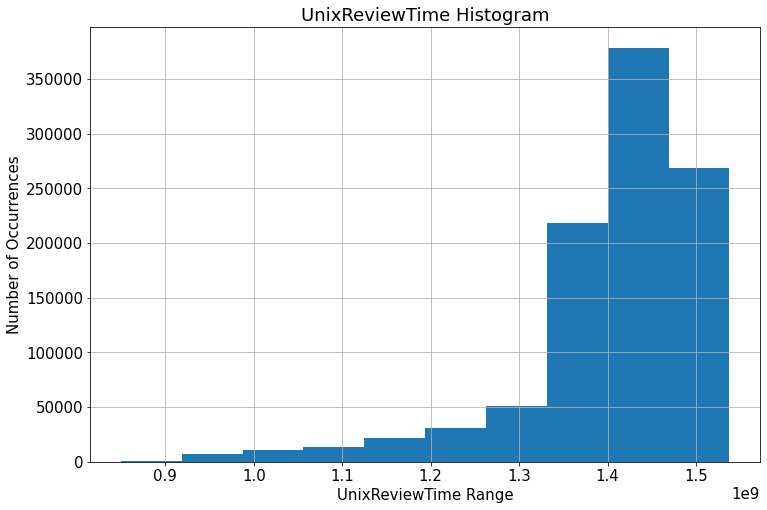

In [ ]:
source_dataset.hist(column=['unixReviewTime'])
plt.xlabel('UnixReviewTime Range')
plt.ylabel('Number of Occurrences')
plt.title('UnixReviewTime Histogram')

## Histogram for the column - reviewText_num_characters

Text(0.5, 1.0, 'ReviewText Number of Characters Histogram')

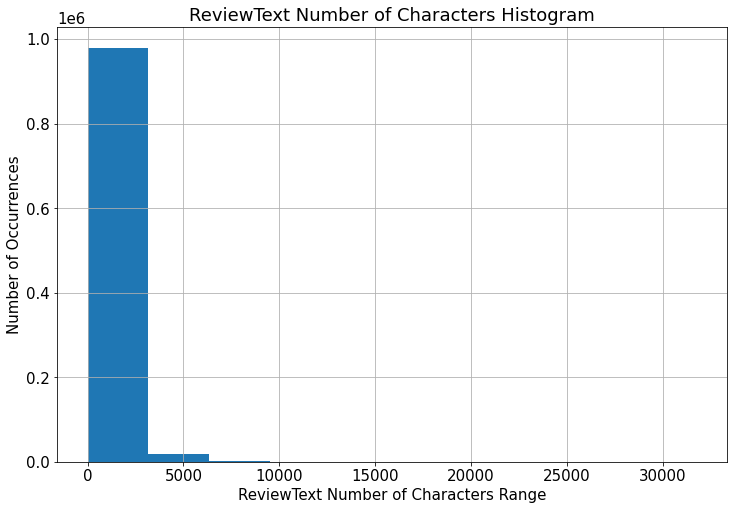

In [ ]:
source_dataset.hist(column=['reviewText_num_characters'])
plt.xlabel('ReviewText Number of Characters Range')
plt.ylabel('Number of Occurrences')
plt.title('ReviewText Number of Characters Histogram')

## Histogram for the column - reviewText_num_words

Text(0.5, 1.0, 'ReviewText Number of Words Histogram')

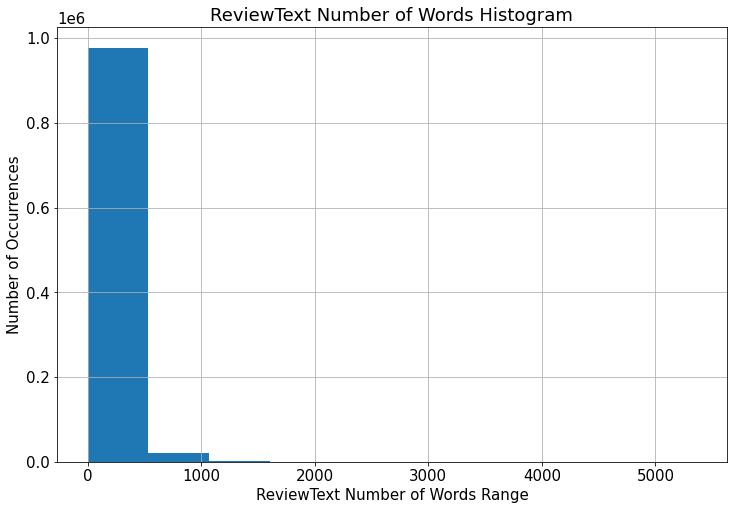

In [ ]:
source_dataset.hist(column=['reviewText_num_words'])
plt.xlabel('ReviewText Number of Words Range')
plt.ylabel('Number of Occurrences')
plt.title('ReviewText Number of Words Histogram')

# Visualization of Categorical Features

## Frequencies of True / False for the Column - "verified"

Text(0.5, 1.0, 'Bar Plot for Verified')

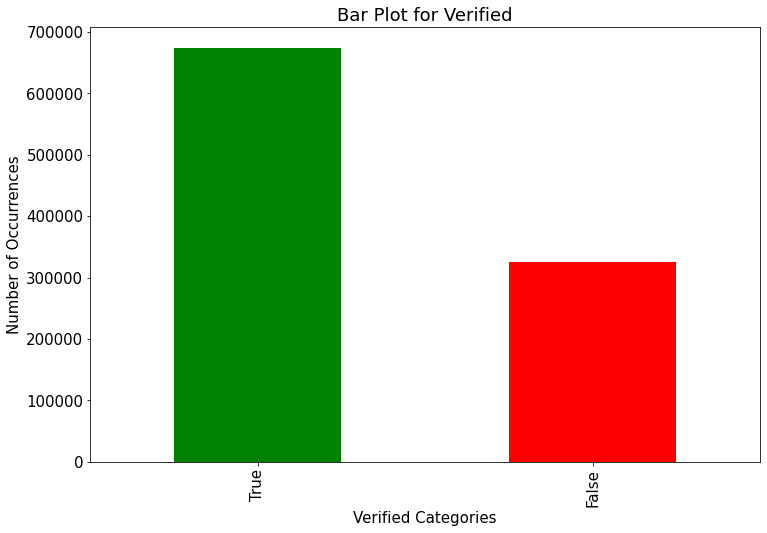

In [ ]:
p1 = source_dataset['verified'].value_counts().plot.bar(color=['green', 'red']);
plt.xlabel('Verified Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Verified')

## Frequency Distribution for the Column - "format"

Text(0.5, 1.0, 'Bar Plot for Format')

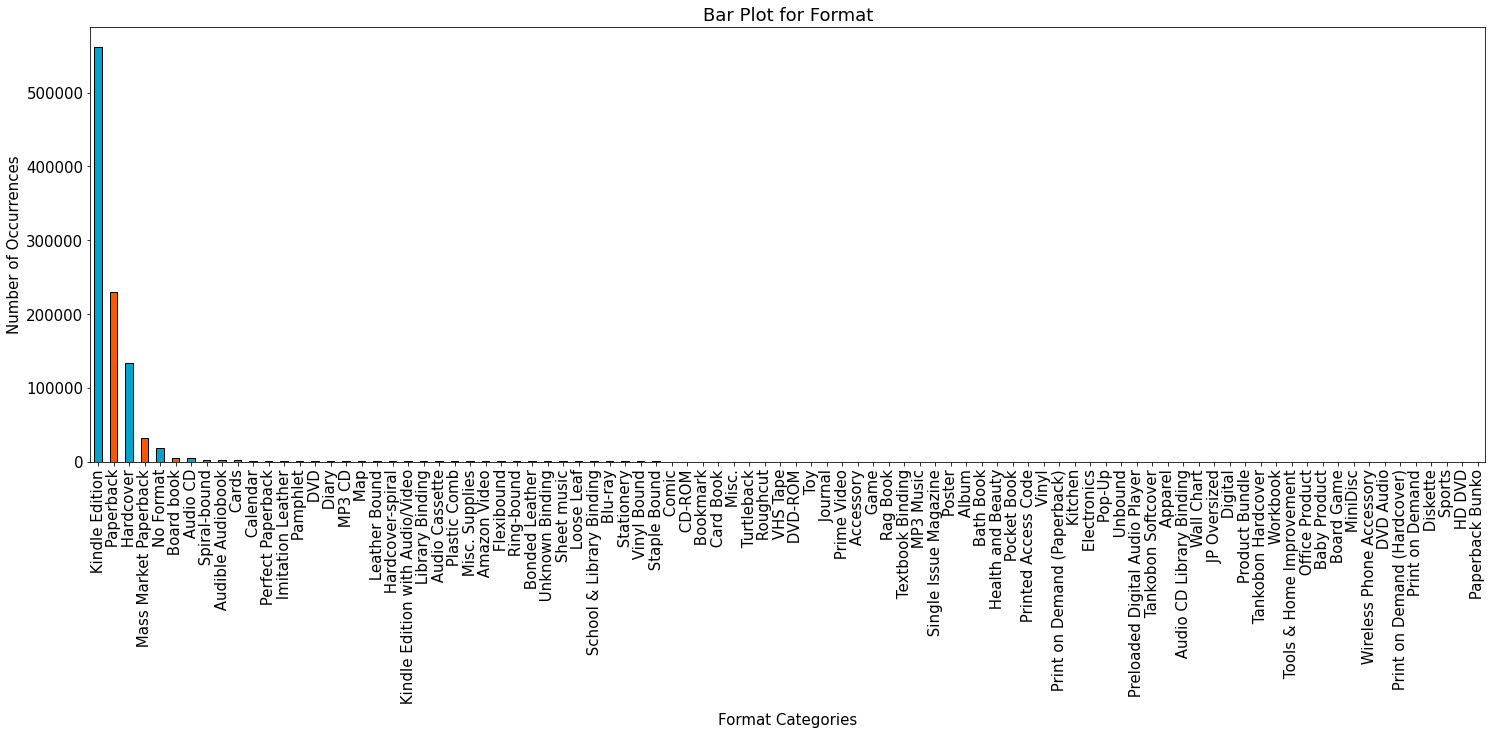

In [ ]:
plt.figure(figsize=(25,8))
p1 = source_dataset['format'].value_counts().plot.bar(color=['#00A4CCFF', '#F95700FF'],edgecolor='black');
plt.xlabel('Format Categories')
plt.ylabel('Number of Occurrences')
plt.title('Bar Plot for Format')

We have not performed Frequency distribution for the other categorical columns as they are insignificant for exploratory analysis.

# 1.C.Data Quality Issues, Plan and Preprocessing

## Missing values:

In [ ]:
source_dataset.isna().sum().sum()

525

In [ ]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   overall                    1000000 non-null  Int64  
 1   verified                   1000000 non-null  boolean
 2   reviewTime                 1000000 non-null  string 
 3   reviewerID                 1000000 non-null  string 
 4   asin                       1000000 non-null  string 
 5   reviewerName               999966 non-null   string 
 6   reviewText                 999876 non-null   string 
 7   summary                    999693 non-null   string 
 8   unixReviewTime             1000000 non-null  Int64  
 9   format                     999940 non-null   string 
 10  reviewText_num_characters  1000000 non-null  int64  
 11  reviewText_num_words       1000000 non-null  int64  
 12  contains_Non_AlphaNumeric  1000000 non-null  object 
dtypes: Int64(2), 

In [ ]:
source_dataset.reviewerName = source_dataset.reviewerName.fillna("No Reviewer Name")

In [ ]:
source_dataset.reviewText = source_dataset.reviewText.fillna("No Review Text")

In [ ]:
source_dataset.summary = source_dataset.summary.fillna("No Summary")

In [ ]:
source_dataset.format = source_dataset.format.fillna("No Format")

In [ ]:
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   overall                    1000000 non-null  Int64  
 1   verified                   1000000 non-null  boolean
 2   reviewTime                 1000000 non-null  string 
 3   reviewerID                 1000000 non-null  string 
 4   asin                       1000000 non-null  string 
 5   reviewerName               1000000 non-null  string 
 6   reviewText                 1000000 non-null  string 
 7   summary                    1000000 non-null  string 
 8   unixReviewTime             1000000 non-null  Int64  
 9   format                     1000000 non-null  string 
 10  reviewText_num_characters  1000000 non-null  int64  
 11  reviewText_num_words       1000000 non-null  int64  
 12  contains_Non_AlphaNumeric  1000000 non-null  object 
dtypes: Int64(2), 

## Irregular Cardinality

The column 'verified' has a cardinality of 2, which is odd for a continuous feature, therefore we will be treating this column as a categorical feature and we will also convert it into "0"s and "1"s.

## "Verfied"

Let's convert the feature 'verified' into numeric values

In [ ]:
source_dataset['verified'].replace(to_replace=True, value=1, inplace=True)
source_dataset['verified'].replace(to_replace=False,  value=0, inplace=True)
source_dataset['verified'] = source_dataset['verified'].astype(int)
source_dataset.dtypes

overall                       Int64
verified                      int64
reviewTime                   string
reviewerID                   string
asin                         string
reviewerName                 string
reviewText                   string
summary                      string
unixReviewTime                Int64
format                       string
reviewText_num_characters     int64
reviewText_num_words          int64
contains_Non_AlphaNumeric    object
dtype: object

In [ ]:
source_dataset.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format,reviewText_num_characters,reviewText_num_words,contains_Non_AlphaNumeric
0,3,0,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,School & Library Binding,617,117,True
1,5,1,"12 11, 2014",A12Q7B7NT716RV,0001712799,True Value Girl,Love it,Five Stars,1418256000,Hardcover,7,2,False
2,4,0,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,Hardcover,1419,247,True
3,4,0,"12 8, 2014",A1JMSX54DO3LOP,0002005263,Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,Kindle Edition,314,45,True
4,2,1,"03 3, 2014",A2IP27AZB3D1SM,0002005263,J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,Kindle Edition,235,45,True
5,4,0,"06 22, 2004",A2KSU7OOJ5C479,0002005263,Loren D. Morrison,"I, like many of the other reviewers here, am a...","A COMPLEX , SUSPENSEFUL PLOT, BUT . . . . .",1087862400,Hardcover,2244,384,True
6,5,1,"01 21, 2004",A3FT7WR9YGU4RK,0002005263,Anne Melvin,I had the CD read by George Guidall who does a...,A good mystery.,1074643200,Audio CD,462,88,True
7,1,1,"06 10, 2003",AMFB2GBB2O84X,0002005263,Brakaian,I am a huge Tony Hillerman fan -- I've read ea...,Easily Hillerman's worst -- very disappointing,1055203200,Hardcover,1781,328,True
8,5,1,"12 18, 2017",A243JAEFC50KWI,0001384198,dorothy,We all love the classics.,Classics never die.,1513555200,Hardcover,25,5,True
9,5,1,"09 6, 2017",A25B7XXSTTN1IY,0001384198,Snake,I love it,Five Stars,1504656000,Hardcover,9,3,False


## Let's perform 'one-hot encoding' to determine the correlation between features and subsequently build models to predict customer churn.

In [ ]:
# #import pandas as pd
# transformed_df = pd.get_dummies(source_dataset, columns = ['format'])
# transformed_df.head(5)

## What is the distribution of the top 50 most frequent words (excluding the stop words) for each of the textual features?

Answer: We will be considering the textual features reviewText and summary for this question

Let us first remove the stop words and create corresponding columns for each of these features

In [ ]:
# source_dataset.drop(["reviewText_num_characters","reviewText_num_words","contains_Non_AlphaNumeric"],axis=1])
# source_dataset.drop(columns=["reviewText_num_characters","reviewText_num_words","contains_Non_AlphaNumeric"],axis=1,inplace=True)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# a = [ ] while(1): a.append('1')



In [ ]:
source_dataset['reviewText'][0]

'Dr. Seuss has some really brilliant books.  This book is just a so-so Dr. Seuss.  As a parent who is familiar with about 15 Dr. Seuss books, this is one of my least favorite books.\nThe book attempts to teach the child what "Up" means.  There is a terrific amount of repetition, and the cleverness in the rhyming and pictures is not "Up!" to par with other Dr. Seuss books.\nMy 6-month old children are too young to understand this book, but I think that Mommy and Daddy will tire of the book long before they have gotten the very simple and trivial message in this book : what is the difference between Up and Down ...'

In [ ]:
# words = [word for w in source_dataset['reviewText_tokenized'] for word in w  if word.lower() not in stop_words]

source_dataset['reviewText_filtered'] = source_dataset['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
source_dataset['summary_filtered'] = source_dataset['summary'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))


# [[w for w in text.split() if w.lower() not in stopwords_set]
#             for text in texts]

In [ ]:
source_dataset['reviewText_filtered'][0]

'Dr. Seuss really brilliant books. book so-so Dr. Seuss. parent familiar 15 Dr. Seuss books, one least favorite books. book attempts teach child "Up" means. terrific amount repetition, cleverness rhyming pictures "Up!" par Dr. Seuss books. 6-month old children young understand book, think Mommy Daddy tire book long gotten simple trivial message book : difference ...'

In [ ]:
# from nltk.probability import FreqDist

# # Count frequency of each token in the list
# FreqDist(words)
# words=pd.series
source_dataset['reviewText_filtered'].value_counts(ascending=False)[0:50]

good           1737
great          1117
Great          1109
Great book      964
Good            898
good book       863
Good read       724
ok              723
Excellent       687
good read       683
Good book       682
great book      642
Great book!     539
Great read      506
love            487
Loved           441
Love            437
Great!          412
Great book.     408
excellent       364
loved           337
Good read.      321
Loved it!       298
great read      296
Good book.      288
Great read!     280
Ok              254
good read.      253
Awesome         231
                230
OK              230
Excellent!      226
nice            224
Thanks          214
Great read.     209
Love it!        207
gift            196
good.           190
Thank           189
expected        178
thanks          177
interesting     175
Loved it.       166
good book.      158
thank           155
helpful         146
A+              144
Perfect         144
Interesting     143
informative     142


In [ ]:
import gc
gc.collect()

267

In [ ]:
source_dataset['summary_filtered'].value_counts(ascending=False)[0:50]

Five Stars       93657
Four Stars       23557
Three Stars       9118
Great book        3501
Good read         3310
Great read        3042
Two Stars         2949
One Star          2752
Loved             2357
Excellent         2327
Loved it!         2235
Great             2089
good read         1929
Good              1857
Good book         1847
good              1802
Great Read        1779
Great Book        1716
Great book!       1607
Good Read         1593
Awesome           1520
Love              1473
Great read!       1461
Amazing           1412
                  1328
Wow               1171
great read        1153
great book        1150
good book         1075
Wonderful         1072
Interesting       1070
Great story        985
Disappointing      917
Great!             867
Enjoyable          829
great              814
Excellent!         807
Good Book          796
love               773
Great Book!        764
ok                 759
Fantastic          729
Disappointed       715
Love it!   

In [ ]:
source_dataset["format"].value_counts(ascending=False)

 Kindle Edition                     561493
 Paperback                          229310
 Hardcover                          133260
 Mass Market Paperback               32080
No Format                            17879
 Board book                           4847
 Audio CD                             4275
 Spiral-bound                         2434
 Audible Audiobook                    2008
 Cards                                1643
 Calendar                              905
 Perfect Paperback                     854
 Imitation Leather                     813
 Pamphlet                              659
 DVD                                   559
 Diary                                 519
 MP3 CD                                514
 Map                                   472
 Leather Bound                         462
 Hardcover-spiral                      427
 Kindle Edition with Audio/Video       423
 Library Binding                       408
 Audio Cassette                        391
 Plastic Co

## As visible from the proportion information, the following are the least common formats of books:

Baby Product

Board Game

MiniDisc

Wireless Phone Accessory

DVD Audio

Print on Demand (Hardcover)

Diskette

Sports

HD DVD

Paperback Bunko


In [ ]:
source_dataset["format"].value_counts(ascending=False)

 Kindle Edition                     561493
 Paperback                          229310
 Hardcover                          133260
 Mass Market Paperback               32080
No Format                            17879
 Board book                           4847
 Audio CD                             4275
 Spiral-bound                         2434
 Audible Audiobook                    2008
 Cards                                1643
 Calendar                              905
 Perfect Paperback                     854
 Imitation Leather                     813
 Pamphlet                              659
 DVD                                   559
 Diary                                 519
 MP3 CD                                514
 Map                                   472
 Leather Bound                         462
 Hardcover-spiral                      427
 Kindle Edition with Audio/Video       423
 Library Binding                       408
 Audio Cassette                        391
 Plastic Co

##Finding Patterns in the Dataset

## Kindle Edition, Paperbacks and Hardcovers are the three most popular formats of Books, within the scope of the dataset.



## Again Kindle Edition, Paperbacks and Hardcovers are the three most popular formats of Books which have an overall score of 5


In [ ]:
source_dataset[source_dataset.overall==5]["format"].value_counts()

 Kindle Edition                     344655
 Paperback                          149846
 Hardcover                           84124
 Mass Market Paperback               17897
No Format                            12160
 Board book                           3819
 Audio CD                             2838
 Spiral-bound                         1755
 Cards                                1224
 Audible Audiobook                    1087
 Calendar                              779
 Perfect Paperback                     625
 Imitation Leather                     623
 Pamphlet                              460
 Diary                                 386
 DVD                                   382
 Leather Bound                         369
 MP3 CD                                332
 Hardcover-spiral                      312
 Map                                   311
 Library Binding                       292
 Plastic Comb                          283
 Misc. Supplies                        261
 Flexibound

## A total of 12160 books where the format wasn't specified had an overall score of 5.

In [ ]:
source_dataset[source_dataset.format=="No Format"]["overall"].value_counts(ascending=True)

2      576
1      651
3     1326
4     3166
5    12160
Name: overall, dtype: Int64

# 2. Text normalization and feature engineering 

## Create a new column merging review summary and text.

In [ ]:
source_dataset['merged_review_summary'] = source_dataset['reviewText'] + source_dataset['summary']

## Remove stop words.

Reference: [Stackoverflow](https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe)

In [ ]:
source_dataset['merged_review_summary'] = source_dataset['merged_review_summary'].apply(lambda x: ' '.join(word.lower() for word in x.split() if word.lower() not in stop_words))

In [ ]:
source_dataset['merged_review_summary'][5]

'i, like many reviewers here, long standing fan tony hillerman\'s mysteries featuring joe "the legendary lieutenant" leaphorn jim chee. i, also like many reviewers, found __the sinister pig__ compelling mystery. carries many themes earlier hillerman mysteries: sgt. jim chee navajo tribal police, love bernadette "bernie" manuelito, formerly tribal police, border patrol. chee afraid tell feelings fear rejection. aforementioned bernadette manuuelito love jim chee, also afraid express love due fear. retired "legendary lieutenant" ever-present maps analytical mind. always pleasure meet three again. powerful businessman/criminal money, political connections, evil intentions let anything anyone stand way. couple ex-c.i.a. agents, one operating incognito murdered almost book opens, working amoral rich man. throw characters pot mix search 40 billion dollars missing royalties never paid various indigenous tribes, c.i.a. man\'s murder, drug smuggling plot, mystery (or perhaps mysteries) requires 

## Remove numbers and other non-letter characters.


In [ ]:
source_dataset['merged_review_summary'] = source_dataset['merged_review_summary'].str.replace('[^a-zA-Z]', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
source_dataset['merged_review_summary'][5]

'i  like many reviewers here  long standing fan tony hillerman s mysteries featuring joe  the legendary lieutenant  leaphorn jim chee  i  also like many reviewers  found   the sinister pig   compelling mystery  carries many themes earlier hillerman mysteries  sgt  jim chee navajo tribal police  love bernadette  bernie  manuelito  formerly tribal police  border patrol  chee afraid tell feelings fear rejection  aforementioned bernadette manuuelito love jim chee  also afraid express love due fear  retired  legendary lieutenant  ever present maps analytical mind  always pleasure meet three again  powerful businessman criminal money  political connections  evil intentions let anything anyone stand way  couple ex c i a  agents  one operating incognito murdered almost book opens  working amoral rich man  throw characters pot mix search    billion dollars missing royalties never paid various indigenous tribes  c i a  man s murder  drug smuggling plot  mystery  or perhaps mysteries  requires be

## Perform either lemmatization or stemming. Motivate your choice.

We have perfromed lemmatization. This is due to the fact that lemmatization reveals the root word corresponding to each word whereas stemming removes the inflections such as "ish" and "ing" from words. We desired to find the root word to perform analysis on the nature of the review. Stemming might have had adverse impact on this analysis since it does not always return complete words.

Please note that we have taken only 100,000 rows, as stated in the assignment handout, in the interest if time and simplicity.

In [ ]:
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# source_dataset['text_lemmatized'] = df.text.apply(lemmatize_text)

from nltk.stem.wordnet import WordNetLemmatizer

# instantiate lemmatizer
lem = WordNetLemmatizer()

# word = "flies"
# # lemmatize "flies" as a verb (flies => (to) fly)
# print("Lemmatized Word:",lem.lemmatize(word,"v"))

min_dataset = source_dataset.iloc[0:100000]

min_dataset['text_lemmatized'] = min_dataset.merged_review_summary.apply(lambda x: ' '.join(lem.lemmatize(word,"v") for word in x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
source_dataset['merged_review_summary'][5]

'i  like many reviewers here  long standing fan tony hillerman s mysteries featuring joe  the legendary lieutenant  leaphorn jim chee  i  also like many reviewers  found   the sinister pig   compelling mystery  carries many themes earlier hillerman mysteries  sgt  jim chee navajo tribal police  love bernadette  bernie  manuelito  formerly tribal police  border patrol  chee afraid tell feelings fear rejection  aforementioned bernadette manuuelito love jim chee  also afraid express love due fear  retired  legendary lieutenant  ever present maps analytical mind  always pleasure meet three again  powerful businessman criminal money  political connections  evil intentions let anything anyone stand way  couple ex c i a  agents  one operating incognito murdered almost book opens  working amoral rich man  throw characters pot mix search    billion dollars missing royalties never paid various indigenous tribes  c i a  man s murder  drug smuggling plot  mystery  or perhaps mysteries  requires be

In [ ]:
min_dataset['text_lemmatized'][5]

'i like many reviewers here long stand fan tony hillerman s mysteries feature joe the legendary lieutenant leaphorn jim chee i also like many reviewers find the sinister pig compel mystery carry many theme earlier hillerman mysteries sgt jim chee navajo tribal police love bernadette bernie manuelito formerly tribal police border patrol chee afraid tell feel fear rejection aforementioned bernadette manuuelito love jim chee also afraid express love due fear retire legendary lieutenant ever present map analytical mind always pleasure meet three again powerful businessman criminal money political connections evil intentions let anything anyone stand way couple ex c i a agents one operate incognito murder almost book open work amoral rich man throw character pot mix search billion dollars miss royalties never pay various indigenous tribes c i a man s murder drug smuggle plot mystery or perhaps mysteries require best leaphorn s analytical abilities chee s intuition begin get bottom things we

We can observe that the merged text has been lemmatized. 

**Example:**

Standing -> Stand

found -> find

## Convert the corpus into a bag-of-words TF-IDF weighted vector representation.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(min_dataset['text_lemmatized'])

#Build a model to predict overall score

The task that we are solving is relevant to Regression since we will be predicting a continuous feature - 'overall score'

## Let's determine the correlation between 'Overall Score' and the other features in the dataframe

**References:**

1. [Seaborn Histogram Plots](https://seaborn.pydata.org/generated/seaborn.histplot.html)

2. [Sort Bar Plots by a Column's values](https://stackoverflow.com/questions/40902958/pandas-dataframe-bar-plot-with-sort-values-by-other-column)

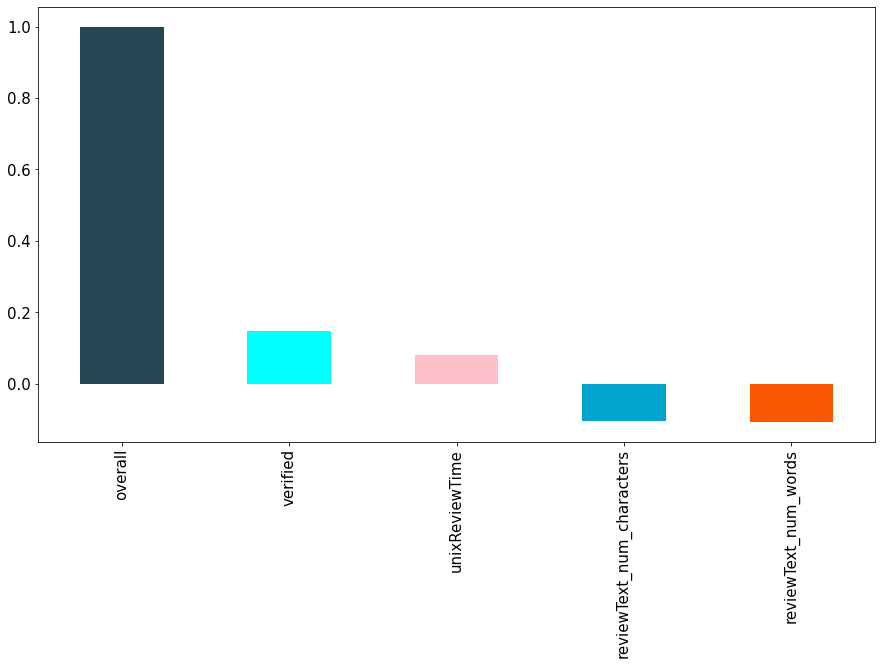

In [ ]:
plt.figure(figsize=(15,8))
colors = ['#264653','cyan', 'pink','#00A4CCFF', '#F95700FF','#101820FF', '#FEE715FF', 'brown','#00539CFF', '#EEA47FFF','gold', 'silver','#ED2B33FF', '#2C5F2D']
min_dataset.corr()['overall'].sort_values(ascending = False).plot(kind = 'bar', color = colors)

## Feature Transformation

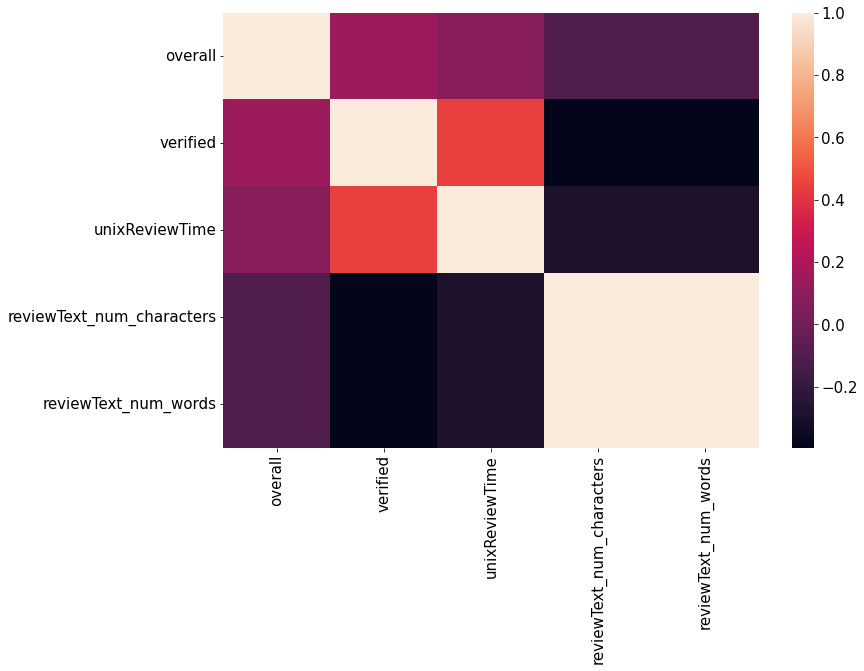

In [ ]:
min_dataset.style
import matplotlib.pyplot as plt
import seaborn as sb
dataplot=sb.heatmap(min_dataset.corr())
plt.show()

### Before we perform feature selection let us drop columns that are obviously irrelevant to score prediction as these features might have an adverse effect on the model.

### Let's also seprarate the Target Feature (overall score) from the Input Features.

In [ ]:
min_dataset.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format,reviewText_num_characters,reviewText_num_words,contains_Non_AlphaNumeric,reviewText_filtered,summary_filtered,merged_review_summary,text_lemmatized
0,3,0,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,School & Library Binding,617,117,True,Dr. Seuss really brilliant books. book so-so D...,below-average Dr. Seuss Book,dr seuss really brilliant books book so so d...,dr seuss really brilliant book book so so dr s...
1,5,1,"12 11, 2014",A12Q7B7NT716RV,0001712799,True Value Girl,Love it,Five Stars,1418256000,Hardcover,7,2,False,Love,Five Stars,love itfive stars,love itfive star
2,4,0,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,Hardcover,1419,247,True,Hand-woven carpets one products Central Asia c...,Tourism history,hand woven carpets one products central asia c...,hand weave carpet one products central asia co...
3,4,0,"12 8, 2014",A1JMSX54DO3LOP,0002005263,Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,Kindle Edition,314,45,True,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",compelling twisting mystery involving several...,compel twist mystery involve several law entit...
4,2,1,"03 3, 2014",A2IP27AZB3D1SM,0002005263,J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,Kindle Edition,235,45,True,read many Hillerman books enjoyed immensely. l...,Tony missed mark,read many hillerman books enjoyed immensely l...,read many hillerman book enjoy immensely later...
5,4,0,"06 22, 2004",A2KSU7OOJ5C479,0002005263,Loren D. Morrison,"I, like many of the other reviewers here, am a...","A COMPLEX , SUSPENSEFUL PLOT, BUT . . . . .",1087862400,Hardcover,2244,384,True,"I, like many reviewers here, long standing fan...","COMPLEX , SUSPENSEFUL PLOT, . . . . .",i like many reviewers here long standing fan...,i like many reviewers here long stand fan tony...
6,5,1,"01 21, 2004",A3FT7WR9YGU4RK,0002005263,Anne Melvin,I had the CD read by George Guidall who does a...,A good mystery.,1074643200,Audio CD,462,88,True,CD read George Guidall excellent job. Many rev...,good mystery.,cd read george guidall excellent job many rev...,cd read george guidall excellent job many revi...
7,1,1,"06 10, 2003",AMFB2GBB2O84X,0002005263,Brakaian,I am a huge Tony Hillerman fan -- I've read ea...,Easily Hillerman's worst -- very disappointing,1055203200,Hardcover,1781,328,True,huge Tony Hillerman fan -- I've read novels mu...,Easily Hillerman's worst -- disappointing,huge tony hillerman fan i ve read novels mu...,huge tony hillerman fan i ve read novels multi...
8,5,1,"12 18, 2017",A243JAEFC50KWI,0001384198,dorothy,We all love the classics.,Classics never die.,1513555200,Hardcover,25,5,True,love classics.,Classics never die.,love classics classics never die,love classics classics never die
9,5,1,"09 6, 2017",A25B7XXSTTN1IY,0001384198,Snake,I love it,Five Stars,1504656000,Hardcover,9,3,False,love,Five Stars,love itfive stars,love itfive star


We will remove irrelevant features like reviewTime and reviewer information. Also we will be removing the original review text and summary since we have merged these two columns, removed stop words and lemmatized the text into one column which is the column - "text_lemmatized".

In [ ]:
# Y=min_dataset.overall
# X=min_dataset.drop(['overall','verified','reviewText_num_characters','reviewText_num_words','reviewTime','reviewerID','asin','reviewerName','unixReviewTime','contains_Non_AlphaNumeric','reviewText','summary','reviewText_filtered','summary_filtered','merged_review_summary','format'],axis=1)
# print(type(X))
# X.head(5)
# Y.head(5)

X = min_dataset['text_lemmatized'].tolist()
Y = min_dataset['overall'].values


# 2.Baseline Model

## Training and evaluate the model on test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
import numpy as np

import nltk
# import the snowball stemmer which is more complex than porter
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report

# download the stopwords
nltk.download('stopwords')

# create a snowball stemmer for English text that does not stem stopwords
stemmer = SnowballStemmer("english", ignore_stopwords=True)

# get newsgroups dataset (categorical classification dataset)
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

# create a class to vectorize stemmed text by frequency counts
class StemmedCountVectorizer(CountVectorizer):
    # function to create an analyzer function
    def build_analyzer(self):
        # initialize CountVectorizer and call build_analyzer on it
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        # return a function that stems each token of input and counts
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

# create an instance of the StemmedCountVectorizer using English stopwords
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

# create a pipeline to take the results of the StemmedCountVectorizer (the stem frequency)
# pass it to a TfidfTransformer to calculate tf-idf weighting, and pass that to a
# SVC to train the classifier on the vectorized corpus.
text_svc_stemmed = Pipeline([('vect', stemmed_count_vect),
                             ('tfidf', TfidfTransformer()),
                             ('svc', SVC())])
y_train=y_train.astype('int')
y_test=y_test.astype('int')
# fit the model to the data
text_svc_stemmed = text_svc_stemmed.fit(twenty_train.data, twenty_train.target)
# predict on new data
predicted_svc_stemmed = text_svc_stemmed.predict(twenty_test.data)

# output performace metrics 
print(classification_report(twenty_test.target, predicted_svc_stemmed))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        11
           5       0.59      1.00      0.74        39

    accuracy                           0.59        66
   macro avg       0.12      0.20      0.15        66
weighted avg       0.35      0.59      0.44        66



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-pa

#Perform part-of-speech tagging

In [ ]:
import pandas as pd
import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
source_dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/sample.jsonl', lines=True)

In [ ]:
source_dataset.head(10)
source_dataset=source_dataset.drop(source_dataset.index[100000:])

In [ ]:
source_dataset.info()
source_dataset = source_dataset.convert_dtypes()
source_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         100000 non-null  int64 
 1   vote            21431 non-null   object
 2   verified        100000 non-null  bool  
 3   reviewTime      100000 non-null  object
 4   reviewerID      100000 non-null  object
 5   asin            100000 non-null  object
 6   style           98182 non-null   object
 7   reviewerName    99997 non-null   object
 8   reviewText      99981 non-null   object
 9   summary         99986 non-null   object
 10  unixReviewTime  100000 non-null  int64 
 11  image           140 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 9.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  

In [ ]:
source_dataset['reviewText']

0        Dr. Seuss has some really brilliant books.  Th...
1                                                  Love it
2        Hand-woven carpets are one of the few products...
3        Compelling, twisting mystery involving several...
4        I have read many of the Hillerman books and en...
                               ...                        
99995    The book was lousy.  Didn't even finish just s...
99996    About the Book

A city is hit by an epidemic o...
99997    Simply stunning. Continues from the previous b...
99998    Great and excellent.. I'm very confortable wit...
99999         I read it in a couple days. Hard to put down
Name: reviewText, Length: 100000, dtype: string

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def custom_tokenize(text):
    if pd.isna(text):
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return nltk.word_tokenize(text)
source_dataset['tokenized_reviewText'] = source_dataset['reviewText'].apply(custom_tokenize)

The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None type. Defaulting to blank string.
The text to be tokenized is a None

In [ ]:
def custom_pos(tokenText):
    return [word for word,pos in nltk.pos_tag(tokenText) if pos == 'NN']

source_dataset['pos_tag_reviewText'] = source_dataset['tokenized_reviewText'].apply(custom_pos)

In [ ]:
source_dataset.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,tokenized_reviewText,pos_tag_reviewText
0,3,2,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,NaN,"[Dr., Seuss, has, some, really, brilliant, boo...","[book, parent, book, child, amount, repetition..."
1,5,<NA>,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,1418256000,NaN,"[Love, it]",[]
2,4,3,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,NaN,"[Hand-woven, carpets, are, one, of, the, few, ...","[rest, world, rest, world, traversal, carpet, ..."
3,4,<NA>,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,NaN,"[Compelling, ,, twisting, mystery, involving, ...","[mystery, law, author, story, line, love, dial..."
4,2,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,NaN,"[I, have, read, many, of, the, Hillerman, book...","[work, story, end, someone, story]"
5,4,4,False,"06 22, 2004",A2KSU7OOJ5C479,0002005263,{'Format:': ' Hardcover'},Loren D. Morrison,"I, like many of the other reviewers here, am a...","A COMPLEX , SUSPENSEFUL PLOT, BUT . . . . .",1087862400,NaN,"[I, ,, like, many, of, the, other, reviewers, ...","[standing, fan, mystery, love, fear, rejection..."
6,5,2,True,"01 21, 2004",A3FT7WR9YGU4RK,0002005263,{'Format:': ' Audio CD'},Anne Melvin,I had the CD read by George Guidall who does a...,A good mystery.,1074643200,NaN,"[I, had, the, CD, read, by, George, Guidall, w...","[CD, job, plot, impression, book, mind, suspen..."
7,1,9,True,"06 10, 2003",AMFB2GBB2O84X,0002005263,{'Format:': ' Hardcover'},Brakaian,I am a huge Tony Hillerman fan -- I've read ea...,Easily Hillerman's worst -- very disappointing,1055203200,NaN,"[I, am, a, huge, Tony, Hillerman, fan, --, I, ...","[fan, book, level, action, place, nothing, res..."
8,5,<NA>,True,"12 18, 2017",A243JAEFC50KWI,0001384198,{'Format:': ' Hardcover'},dorothy,We all love the classics.,Classics never die.,1513555200,NaN,"[We, all, love, the, classics, .]",[]
9,5,<NA>,True,"09 6, 2017",A25B7XXSTTN1IY,0001384198,{'Format:': ' Hardcover'},Snake,I love it,Five Stars,1504656000,NaN,"[I, love, it]",[]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = source_dataset['pos_tag_reviewText'].tolist()
y = source_dataset['overall'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




In [ ]:
# # create a class to vectorize stemmed text by frequency counts
# class StemmedCountVectorizer(CountVectorizer):
#     # function to create an analyzer function
#     def build_analyzer(self):
#         # initialize CountVectorizer and call build_analyzer on it
#         analyzer = super(StemmedCountVectorizer, self).build_analyzer()
#         # return a function that stems each token of input and counts
#         return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

# create an instance of the StemmedCountVectorizer using English stopwords
# stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

def identity_tokenizer(text):
    return text

text_svc_stemmed = Pipeline([('vect', CountVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False)),
                             ('tfidf', TfidfTransformer()),
                            #  ('tfidf', TfidfVectorizer()),
                             ('svc', SVC())
                             ])
y_train=y_train.astype('int')
y_test=y_test.astype('int')
# fit the model to the data
text_svc_stemmed = text_svc_stemmed.fit(X_train, y_train)
# predict on new data
predicted_svc_stemmed = text_svc_stemmed.predict(X_test)

# output performace metrics 
print(classification_report(y_test, predicted_svc_stemmed))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        11
           5       0.59      1.00      0.74        39

    accuracy                           0.59        66
   macro avg       0.12      0.20      0.15        66
weighted avg       0.35      0.59      0.44        66



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-pa

# References

[1] M. Taranukhin, “Panopto,” Panopto, Jul. 21, 2022. https://dal.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7632da06-6dfd-420b-a20e-ae9b0122ef2d (accessed Jul. 27, 2022).

[2] “3.4. Validation curves: plotting scores to evaluate models,” scikit-learn, Apr. 18, 2019. https://scikit-learn.org/stable/modules/learning_curve.html (accessed Jul. 27, 2022).

[3] “Python | Lemmatization with NLTK,” GeeksforGeeks, Nov. 06, 2018. https://www.geeksforgeeks.org/python-lemmatization-with-nltk/#:~:text=Lemmatization%20is%20the%20process%20of (accessed Jul. 26, 2022).

[4] “Stemming and Lemmatization in Python,” www.datacamp.com, Jul. 25, 2016. https://www.datacamp.com/tutorial/stemming-lemmatization-python (accessed Jul. 26, 2022).

[5] A. Fardeen, “NLTK Tokenize - Complete Tutorial for Beginners,” MLK - Machine Learning Knowledge, Apr. 06, 2021. https://machinelearningknowledge.ai/nltk-tokenizer-tutorial-with-word_tokenize-sent_tokenize-whitespacetokenizer-wordpuncttokenizer/#:~:text=Character%20tokenization%20is%20the%20process (accessed Jul. 27, 2022).

[6] G. Bedi, “Simple guide to Text Classification(NLP) using SVM and Naive Bayes with Python,” Medium, Nov. 09, 2018. https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34 (accessed Jul. 26, 2022).

[7] “Python remove stop words from pandas dataframe,” Stack Overflow, May 22, 2018. https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe (accessed Jul. 28, 2022).

[8] “TF-IDF with Scikit-Learn — Introduction to Cultural Analytics & Python,” melaniewalsh.github.io, Nov. 19, 2017. https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html


